In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
# un vistazo dentro del set de datos
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Sumarizar los datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


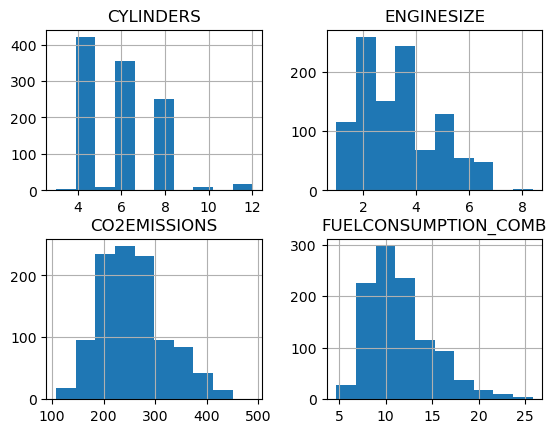

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

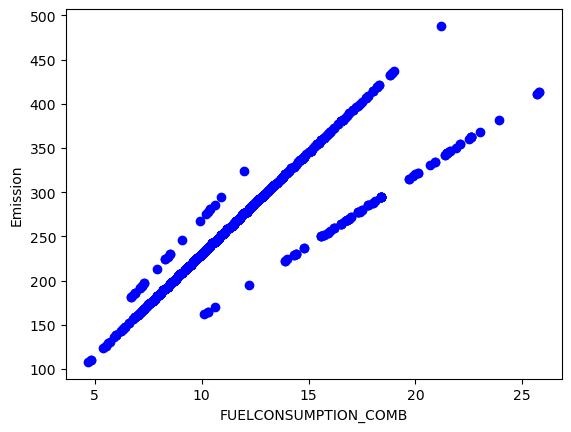

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

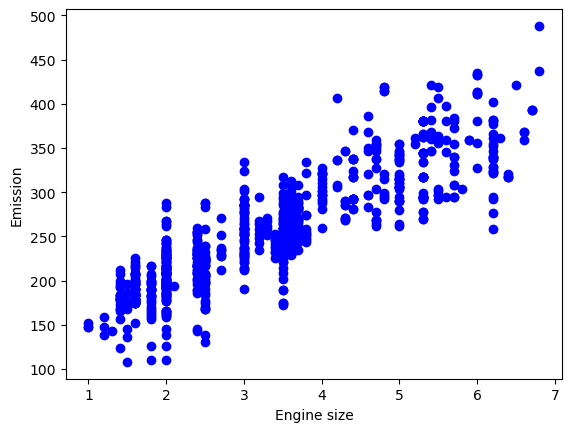

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.62052347]]
Intercept:  [123.80107025]


In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 23.07
Suma residual de los cuadrados (MSE): 925.90
R2-score: 0.73


Text(0, 0.5, 'Emission')

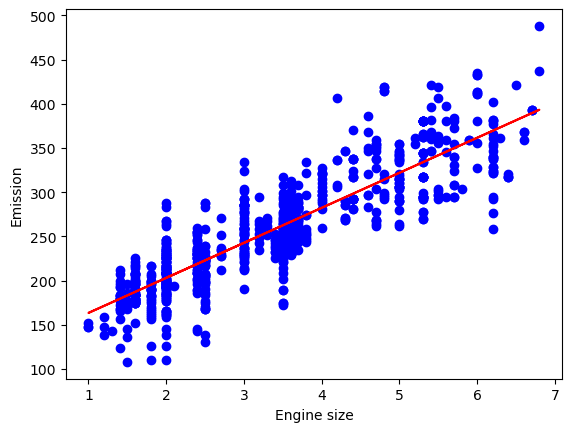

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# RETO 2 
## Analice las variables e implemente un modelo de regresión múltiple que mejore la predicción del modelo.

In [12]:
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_y_=regr2.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[ 7.35246866 10.70609341  9.71983135]]
Intercept:  [65.35548583]


In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr2.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 16.84
Suma residual de los cuadrados (MSE): 534.98
R2-score: 0.84


# RETO 1
## Utilice el algoritmo K-fold cross validation e indique el polinomio que tenga mejor precisión.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [16]:
dataset = pd.read_csv('FuelConsumptionCo2.csv')
dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [17]:
dataset_2= dataset.drop(['MODELYEAR',"MAKE","MODEL","VEHICLECLASS","TRANSMISSION","FUELTYPE","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB_MPG"], axis=1)
print(dataset_2)
X = dataset_2.iloc[:, 0:5].values
y = dataset_2. iloc [:, 3].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1067 rows x 4 columns]
Matrix of features
[[  2.    4.    8.5 196. ]
 [  2.4   4.    9.6 221. ]
 [  1.5   4.    5.9 136. ]
 ...
 [  3.    6.   11.8 271. ]
 [  3.2   6.   11.3 260. ]
 [  3.2   6.   12.8 294. ]]
--------------------

In [19]:
train_data = pd.read_csv('FuelConsumptionCo2.csv')

# Remove rows with missing target values, Eliminar filas a las que les faltan valores objetivo
train_data.dropna(axis=0, subset=['CO2EMISSIONS'], inplace=True)


y = train_data.CO2EMISSIONS # Target variable, variable objetivo


# Removing target variable from training data, 
# Eliminación de la variable objetivo de los datos de entrenamiento
train_data.drop(['CO2EMISSIONS'], axis=1, inplace=True)


numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

print(X.head()) # Show first 5 training examples
print(y.head()) # Show first 5 target examples

Shape of input data: (1067, 7) and shape of target variable: (1067,)
   MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0       2014         2.0          4                   9.9   
1       2014         2.4          4                  11.2   
2       2014         1.5          4                   6.0   
3       2014         3.5          6                  12.7   
4       2014         3.5          6                  12.1   

   FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
0                  6.7                   8.5                        33  
1                  7.7                   9.6                        29  
2                  5.8                   5.9                        48  
3                  9.1                  11.1                        25  
4                  8.7                  10.6                        27  
0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64


In [20]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# Vamos a dividir los datos en 5 pliegues.
# Usaremos este objeto 'kf' (estrategia de división de KFold) como entrada para el método cross_val_score()
kf =KFold(n_splits=5, shuffle=False, random_state=None)

#n_splits es para dividirlos en lotes
#shuffle es para que mezclar los datos antes de dividirlos en lotes.
#random_state es para crear aleatoriedad de cada pliegue
#para este ejercicio queremos que tome los primeros datos, los segundos, y asi sucesivamente

cnt = 1
# split()  method generate indices to split data into training and test set.
# El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba.

# df = df.filter(items = [2], axis=0)

from sklearn import linear_model
regr3 = linear_model.LinearRegression()

dic_result={}

for train_index, test_index in kf.split(X, y):
    #print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}') # caracteristicas de la seleccion
    #print(train_index) #estos son los indices que se usaran

    print()
    print()
    print(f"split = {cnt}")

    #................. start training ....................................
    X_1=X.filter(items = train_index, axis=0)
    Y_1=y.filter(items = train_index, axis=0)
    #print(X_1) dataframe solo de los valores de entrenamiento
    #print(Y_1) dataframe solo de los valores objetivo

    train_x = np.asanyarray(X_1[["ENGINESIZE",'CYLINDERS',"FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY",
                                   "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]])
    train_y = np.asanyarray(Y_1)
    test_y_=regr3.fit (train_x, train_y)
    # The coefficients
    print ('Coefficients: ', regr3.coef_)
    print ('Intercept: ',regr3.intercept_)
    #................. finish training ....................................
    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)    

    test_x = np.asanyarray(X_2[["ENGINESIZE",'CYLINDERS',"FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY",
                                   "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = regr3.predict(test_x)

    print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_result[cnt]=[regr3.coef_.tolist(),regr3.intercept_,round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1




split = 1
Coefficients:  [ 10.58881567   6.80535177 -12.80107169  -2.43713773  18.74480724
  -3.98470661]
Intercept:  261.73916993027217
Error medio absoluto: 13.40
Suma residual de los cuadrados (MSE): 378.36
R2-score: 0.87


split = 2
Coefficients:  [  6.46541274   6.43017144 -13.02572298  -8.9921796   26.7999219
  -3.81282753]
Intercept:  247.9232524565329
Error medio absoluto: 20.08
Suma residual de los cuadrados (MSE): 961.00
R2-score: 0.79


split = 3
Coefficients:  [  9.55396506   7.42611284 -11.53795789  -4.55773331  20.30176712
  -3.54731184]
Intercept:  236.49899587976302
Error medio absoluto: 14.95
Suma residual de los cuadrados (MSE): 527.51
R2-score: 0.86


split = 4
Coefficients:  [  9.14619085   8.40548199 -10.60128767  -2.37741894  16.41448304
  -3.7563466 ]
Intercept:  249.91654294475413
Error medio absoluto: 13.05
Suma residual de los cuadrados (MSE): 327.68
R2-score: 0.90


split = 5
Coefficients:  [ 7.8494973   8.42021999 -3.60209627  2.47635951  4.34849132 -4.079


VALORES DE LOS MEJORES COEFICIENTES Y EL INTERCEPTO, OBTENIDOS DEL PROMEDIO DE USAR 5 SPLITS CON ---> K-fold cross validation
Valores_coef_promedio
COEF_ENGINESIZE                    8.720776
COEF_CYLINDERS                     7.497468
COEF_FUELCONSUMPTION_CITY        -10.313627
COEF_FUELCONSUMPTION_HWY          -3.177622
COEF_FUELCONSUMPTION_COMB         17.321894
COEF_FUELCONSUMPTION_COMB_MPG     -3.836138
Intercept                        251.715298
dtype: float64




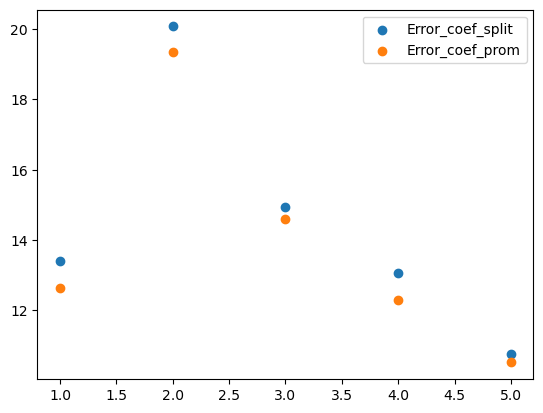

   SPLIT  COEF_ENGINESIZE  COEF_CYLINDERS  COEF_FUELCONSUMPTION_CITY  \
0    1.0         8.720776        7.497468                 -10.313627   
1    2.0         8.720776        7.497468                 -10.313627   
2    3.0         8.720776        7.497468                 -10.313627   
3    4.0         8.720776        7.497468                 -10.313627   
4    5.0         8.720776        7.497468                 -10.313627   
5    1.0        10.588816        6.805352                 -12.801072   
6    2.0         6.465413        6.430171                 -13.025723   
7    3.0         9.553965        7.426113                 -11.537958   
8    4.0         9.146191        8.405482                 -10.601288   
9    5.0         7.849497        8.420220                  -3.602096   

   COEF_FUELCONSUMPTION_HWY  COEF_FUELCONSUMPTION_COMB  \
0                 -3.177622                  17.321894   
1                 -3.177622                  17.321894   
2                 -3.177622      

In [21]:
from pandas._libs.lib import dicts_to_array
#nombre de columnas de dataframe resultados

lista_nombres_columnas=["SPLIT","COEF_ENGINESIZE",'COEF_CYLINDERS',"COEF_FUELCONSUMPTION_CITY","COEF_FUELCONSUMPTION_HWY",
                        "COEF_FUELCONSUMPTION_COMB","COEF_FUELCONSUMPTION_COMB_MPG","Intercept","Error_medio_abs",
                        "Suma_residual","R2-score"]
dict_result_1={}
list_temp=[]

# .............. inicio pasar todo a un dataframe de resultados ....................

for i in dic_result:
  list_temp.append(i)

  for ii in dic_result[i][0]:
    list_temp.append(ii)
  
  for ii in dic_result[i][1:]:
    list_temp.append(ii)

  dict_result_1[i]=list_temp

  list_temp=[]

for i in dict_result_1:

  list_temp.append(dict_result_1[i])

array_temp_2=np.array(list_temp)

data_result=pd.DataFrame(array_temp_2,columns=lista_nombres_columnas)

#print(data_result)

# .............. fin pasar todo a un dataframe de resultados ....................

# .............. inicio conseguir el valor medio de los coeficientes y el intercepto ...........

data_valor_medio=data_result[["COEF_ENGINESIZE",'COEF_CYLINDERS',"COEF_FUELCONSUMPTION_CITY","COEF_FUELCONSUMPTION_HWY",
                        "COEF_FUELCONSUMPTION_COMB","COEF_FUELCONSUMPTION_COMB_MPG","Intercept"]].mean()

print()
print("VALORES DE LOS MEJORES COEFICIENTES Y EL INTERCEPTO, OBTENIDOS DEL PROMEDIO DE USAR 5 SPLITS CON ---> K-fold cross validation")
print("Valores_coef_promedio")
print(data_valor_medio)

# .............. fin conseguir el valor medio de los coeficientes y el intercepto ...........

# .............. inicio analizar el training con los nuevos valores ...........

array_coeficientes=np.array(data_valor_medio.values.tolist())

dic_array_split={}

cnt = 1

print()
print()

for train_index, test_index in kf.split(X, y):

    #................. start texting ....................................
    X_2=X.filter(items = test_index, axis=0)
    Y_2=y.filter(items = test_index, axis=0)
    X_2['Intercept']=1    

    test_x = np.asanyarray(X_2[["ENGINESIZE",'CYLINDERS',"FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY",
                                   "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG","Intercept"]])
    
    test_y = np.asanyarray(Y_2)
    test_y_ = test_x.dot(array_coeficientes)

    #print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    #print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    #print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    #................. finsh texting ....................................

    dic_array_split[cnt]=[array_coeficientes.tolist(),round(np.mean(np.absolute(test_y_ - test_y)),4),round(np.mean((test_y_ - test_y) ** 2),4),round(r2_score(test_y_ , test_y),4)]

    cnt += 1

#print(dic_array_split)
# .............. fin analizar el training con los nuevos valores ...........

# .............. inicio pasar todo a un dataframe de resultados ....................

dic_result_2={}

list_temp=[]

for i in dic_array_split:
  list_temp.append(i)

  for ii in dic_array_split[i][0]:
    list_temp.append(ii)

  for ii in dic_array_split[i][1:]:
    list_temp.append(ii)

  dic_result_2[i]=list_temp

  list_temp=[]

for i in dic_result_2:

  list_temp.append(dic_result_2[i])

array_temp=np.array(list_temp)

array_temp=np.insert(array_temp, array_temp.shape[1], np.array((1, 1, 1, 1, 1)), 1)
array_temp_2=np.insert(array_temp_2, array_temp_2.shape[1], np.array((0, 0, 0, 0, 0)), 1)

array_temp_3=np.concatenate((array_temp, array_temp_2), axis=0)

#print(array_temp_3)

lista_nombres_columnas.append("classification")

data_result_2=pd.DataFrame(array_temp_3,columns=lista_nombres_columnas)

#print(data_result_2)

data_filter_1=data_result_2[(data_result_2["classification"]==1)]
data_filter_0=data_result_2[(data_result_2["classification"]==0)]

x_graf_0=data_filter_0[["SPLIT"]].values.tolist()
y_graf_0=data_filter_0[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf_0, y_graf_0,label="Error_coef_split")
x_graf=data_filter_1[["SPLIT"]].values.tolist()
y_graf=data_filter_1[["Error_medio_abs"]].values.tolist()
plt.scatter(x_graf, y_graf,label="Error_coef_prom")
plt.legend()
plt.show()

print(data_result_2)
# .............. fin pasar todo a un dataframe de resultados ....................